max flow: 1781.5994
flow range:
u = -1476.286 .. 1000.282
v = -45.317 .. 1043.203


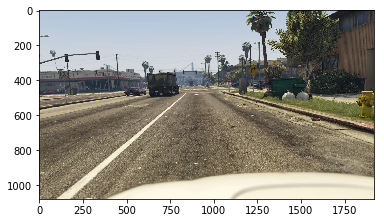

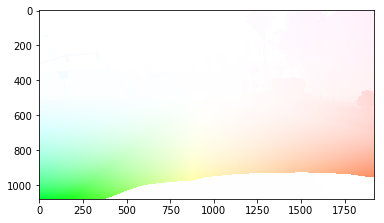

In [16]:
# Check optical flow data after filtering
import os
import numpy as np
from PIL import Image
import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sys
sys.path.append('/home/yi/code/video_motion4/visualize/')
import flowlib

img_name = os.path.join('/media/yi/DATA/data-orig/VIPER/train/img/001/001_00002.jpg')
flow_name = os.path.join('/media/yi/DATA/data-orig/VIPER/train/flow/001/001_00002.mat')

im = np.array(Image.open(img_name), dtype=np.uint8)

flow = loadmat(flow_name)
flow = np.dstack((flow['u'], flow['v']))
# print flow
flow[np.isnan(flow)] = 0

optical_flow = flowlib.visualize_flow(flow)
optical_flow = optical_flow / 255.0
# print(optical_flow)

# Create figure and axes
fig,ax = plt.subplots(1)

ax.imshow(im)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(optical_flow)

# plt.show()

In [21]:
def suppress_flow(flow_dir, new_flow_dir):
    for sub_dir in os.listdir(flow_dir):
        flow_files = os.listdir(os.path.join(flow_dir, sub_dir))

        if not os.path.exists(os.path.join(new_flow_dir, sub_dir)):
            os.mkdir(os.path.join(new_flow_dir, sub_dir))
        print(os.path.join(new_flow_dir, sub_dir))
        
        for flow_file in flow_files:
            flow_name = os.path.join(flow_dir, sub_dir, flow_file)
            print flow_file
            flow = loadmat(flow_name)
            flow = np.dstack((flow['u'], flow['v']))
            # print flow
            flow[np.isnan(flow)] = 0
            print flow.shape

In [22]:
flow_dir = '/media/yi/DATA/data-orig/VIPER/train/flow_example'
new_flow_dir = '/media/yi/DATA/data-orig/VIPER/train/flow_example_new'

suppress_flow(flow_dir, new_flow_dir)

/media/yi/DATA/data-orig/VIPER/train/flow_example_new/001
001_00001.mat
(1080, 1920, 2)
001_00002.mat
(1080, 1920, 2)
/media/yi/DATA/data-orig/VIPER/train/flow_example_new/002
002_00001.mat
(1080, 1920, 2)
002_00002.mat
(1080, 1920, 2)
002_00003.mat
(1080, 1920, 2)
